## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df=pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"]) #merge both dataframes on the "Mouse ID" columns 

# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
merged_df.nunique()["Mouse ID"] #add one to the count if the value in the Mouse ID column is unique

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate=merged_df[merged_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse=merged_df.loc[merged_df["Mouse ID"]=="g989"] #locate all datapoints for the duplicate mouse
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#drop the duplicate mouse (Mouse ID = g989 from the dataframe)
clean_df=merged_df.loc[merged_df["Mouse ID"]!="g989"] #create a new dataframe with all datapoints that don't have a Mouse ID of the duplicate mouse
#clean_df=merged_df.drop_duplicates(["Mouse ID","Timepoint"], keep=False).reset_index(drop=True) #drop all datapoints in a row if the Mouse ID and Timepoint columns are duplicates
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_df.nunique()["Mouse ID"]

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#clean_df["Drug Regimen"].unique()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean=clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"] #group the dataframe by Drug Regimen column and find the mean value of the Tumor Volume for each group
tumor_median=clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"] #group the dataframe by Drug Regimen column and find the median value of the Tumor Volume for each group
tumor_var=clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"] #group the dataframe by Drug Regimen column and find the variance of the Tumor Volume for each group
tumor_stdev=clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"] #group the dataframe by Drug Regimen column and find the standard deviation of the Tumor Volume for each group
tumor_sem=clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"] #group the dataframe by Drug Regimen column and find the standard error of the mean value of the Tumor Volume for each group

# Assemble the resulting series into a single summary dataframe.
tumor_data={
    "Mean Tumor Vol": tumor_mean,
    "Median Tumor Vol": tumor_median,
    "Variance of Tumor Vol": tumor_var,
    "Standard Deviation of Tumor Vol": tumor_stdev,
    "Standard Error of Tumor Vol": tumor_sem
} #create a dictionary for the summary statistics
tumor_summary=pd.DataFrame(tumor_data) #create a dataframe using the dictionary of the summary statistics
tumor_summary

,Mean Tumor Vol,Median Tumor Vol,Variance of Tumor Vol,Standard Deviation of Tumor Vol,Standard Error of Tumor Vol
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
import numpy as np
clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]}) #group the dataframe by Drug Regimen, and found the summary statistics for Tumor Volume column of the dataframe

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

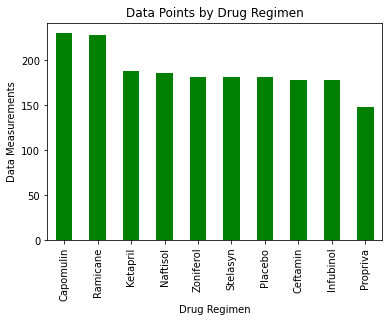

In [54]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_counts=clean_df["Drug Regimen"].value_counts() #count the data rows for each value in the Drug Regimen column in the dataframe
plt.xlabel("Drug Regimen")
plt.ylabel("Data Measurements")
drug_counts.plot(kind="bar", color='g', align="center")
plt.title("Data Points by Drug Regimen")
plt.show()

Text(0.5, 1.0, 'Data Points by Drug Regimen')

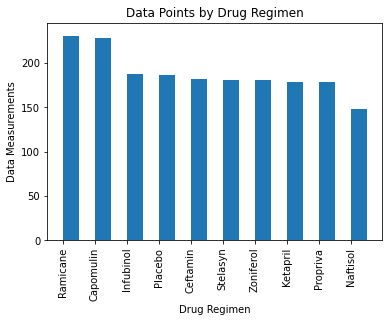

In [83]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis=clean_df["Drug Regimen"].unique() #create a list of all unique values in the Drug Regimen column
heights=clean_df["Drug Regimen"].value_counts() #create a list of the count of each unique value in the Drug Regimen column

plt.bar(x=x_axis, height=heights, align="edge", width=0.5) #create a bar chart of the Drug Regimen column data

plt.ylim(0, max(heights)+ 15) #set the limits of the y-axis of the bar chart
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],labels=x_axis, rotation='vertical') #rotate the labels on the x-axis
plt.xlabel("Drug Regimen")
plt.ylabel("Data Measurements")
plt.title("Data Points by Drug Regimen")

<AxesSubplot:title={'center':'Distribution of Mice by Sex'}, ylabel='Sex'>

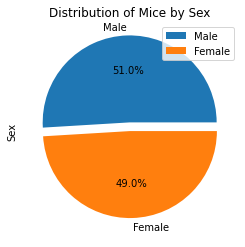

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#binary world so total-female=male
mice_sex_count=clean_df["Sex"].value_counts() #get the count of data rows based on the values in the "Sex" column of the dataframe

mice_sex_count.plot(kind="pie",autopct="%1.1f%%", explode=[0.1, 0.0],legend=True,title="Distribution of Mice by Sex") #created a pie plot based on the Sex values

Text(0.5, 1.0, 'Distribution of Mice by Sex')

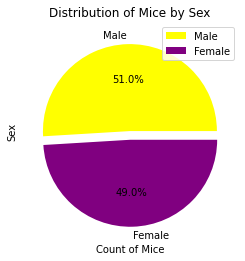

In [85]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_sex_count.values, labels=mice_sex_count.index, autopct="%1.1f%%", explode=[0.0, 0.1], colors=["yellow", "purple"]) #create a matplot pie graph of the Sex values 
plt.ylabel("Sex")
plt.xlabel("Count of Mice")
plt.legend()
plt.title("Distribution of Mice by Sex")

## Quartiles, Outliers and Boxplots

In [93]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_mouse=clean_df.groupby("Mouse ID").max()["Timepoint"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
pd.merge(clean_df, max_mouse, how="inner", on="Mouse ID")


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

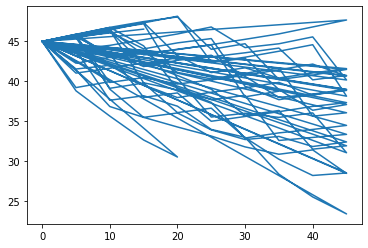

In [99]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df=clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"] #create a new dataframe of data for the Capomulin regimen
cap_vol_df=capomulin_df.loc[:,"Tumor Volume (mm3)"] #filters the Capomulin dataframe to only show Tumor Volume
cap_time_df=capomulin_df.loc[:,"Timepoint"] #filters the Capomulin dataframe to only show the Timepoint
plt.plot(cap_time_df.values, cap_vol_df.values)

<AxesSubplot:xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

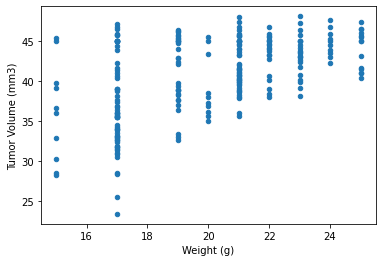

In [100]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df.plot.scatter(x='Weight (g)',y='Tumor Volume (mm3)')

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#hint positive correlation